In [1]:
import tensorflow as tf
import os

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Num CPUs Available: ", len(tf.config.list_physical_devices('CPU')))

Num GPUs Available:  1
Num CPUs Available:  1


In [3]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data'
image_exts = ['jpg', 'jpg', 'png']

In [6]:
os.listdir(os.path.join(data_dir, 'edible'))

['ce (1).jpeg',
 'ce (1).jpg',
 'ce (10).jpg',
 'ce (100).jpg',
 'ce (101).jpg',
 'ce (102).jpg',
 'ce (103).jpg',
 'ce (104).jpg',
 'ce (105).jpg',
 'ce (106).jpg',
 'ce (107).jpg',
 'ce (108).jpg',
 'ce (109).jpg',
 'ce (11).jpg',
 'ce (110).jpg',
 'ce (111).jpg',
 'ce (112).jpg',
 'ce (113).jpg',
 'ce (114).jpg',
 'ce (115).jpg',
 'ce (116).jpg',
 'ce (117).jpg',
 'ce (118).jpg',
 'ce (119).jpg',
 'ce (12).jpg',
 'ce (120).jpg',
 'ce (121).jpg',
 'ce (122).jpg',
 'ce (123).jpg',
 'ce (124).jpg',
 'ce (125).jpg',
 'ce (126).jpg',
 'ce (127).jpg',
 'ce (128).jpg',
 'ce (129).jpg',
 'ce (13).jpg',
 'ce (130).jpg',
 'ce (131).jpg',
 'ce (132).jpg',
 'ce (133).jpg',
 'ce (134).jpg',
 'ce (135).jpg',
 'ce (136).jpg',
 'ce (137).jpg',
 'ce (138).jpg',
 'ce (139).jpg',
 'ce (14).jpg',
 'ce (140).jpg',
 'ce (141).jpg',
 'ce (142).jpg',
 'ce (143).jpg',
 'ce (144).jpg',
 'ce (145).jpg',
 'ce (146).jpg',
 'ce (147).jpg',
 'ce (148).jpg',
 'ce (149).jpg',
 'ce (15).jpg',
 'ce (150).jpg',
 'ce (

In [7]:
# tf.data.Dataset
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1262 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

In [11]:
batch[1]

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1])

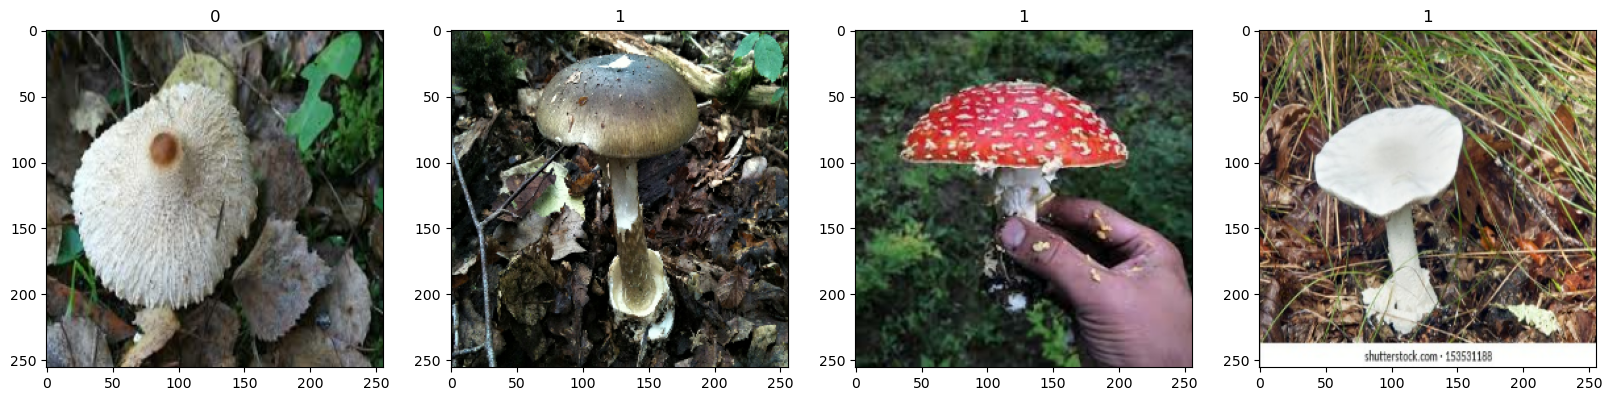

In [12]:
# 1 - inedible
# 0 - edible

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
data = data.map(lambda x, y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()


In [14]:
batch[0].min()

0.0

In [15]:
len(data)

40

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) + 2
test_size = int(len(data)*.1) + 2

In [17]:
print(train_size, test_size, val_size)

28 6 10


In [18]:
24 + 6 + 10

40

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [20]:
len(train)

28

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import layers, regularizers

In [22]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [23]:
model = Sequential()

# model.add(data_augmentation)
model.add(Conv2D(16, (3,3), 1, padding='same', kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, padding='same', kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())

model.add(Dense(256, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
# model.build(batch[0].shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 16)      

In [26]:
logdir='logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/15
28/28 [==============================] - 7s 69ms/step - loss: 3.2140 - accuracy: 0.4955 - val_loss: 1.8144 - val_accuracy: 0.5469
Epoch 2/15
28/28 [==============================] - 2s 74ms/step - loss: 1.2714 - accuracy: 0.5346 - val_loss: 0.9153 - val_accuracy: 0.6156
Epoch 3/15
28/28 [==============================] - 2s 74ms/step - loss: 0.8054 - accuracy: 0.5569 - val_loss: 0.7518 - val_accuracy: 0.5094
Epoch 4/15
28/28 [==============================] - 2s 73ms/step - loss: 0.7413 - accuracy: 0.5201 - val_loss: 0.7321 - val_accuracy: 0.4969
Epoch 5/15
28/28 [==============================] - 2s 73ms/step - loss: 0.7186 - accuracy: 0.5480 - val_loss: 0.7034 - val_accuracy: 0.5938
Epoch 6/15
28/28 [==============================] - 2s 73ms/step - loss: 0.7036 - accuracy: 0.5603 - val_loss: 0.6991 - val_accuracy: 0.5406
Epoch 7/15
28/28 [==============================] - 2s 73ms/step - loss: 0.6880 - accuracy: 0.6038 - val_loss: 0.7156 - val_accuracy: 0.5531
Epoch 8/15
28

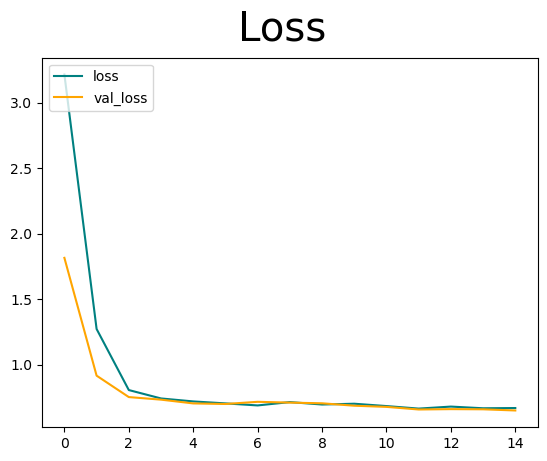

In [28]:
fig = plt.figure()

plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Loss', fontsize=29)
plt.legend(loc="upper left")
plt.show()

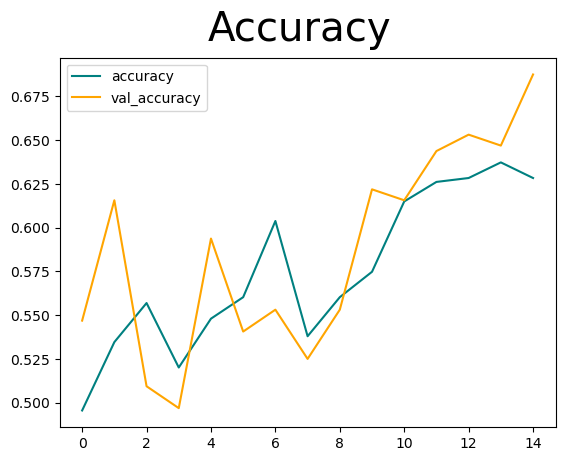

In [29]:
fig = plt.figure()

plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.suptitle('Accuracy', fontsize=29)
plt.legend(loc="upper left")
plt.show()

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 378ms/step


In [33]:
print('precision: ', pre.result().numpy(), 'recall: ', re.result().numpy(), 'accuracy: ', acc.result().numpy())

precision:  0.68 recall:  0.73913044 accuracy:  0.6956522


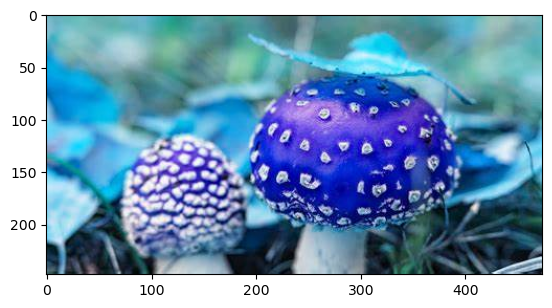

In [34]:
img = cv2.imread('one.jpg')
plt.imshow(img)
plt.show()

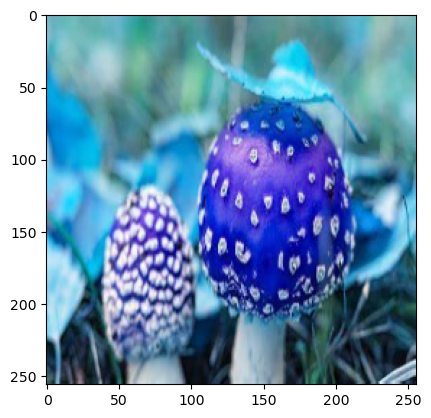

In [35]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 302ms/step


In [37]:
yhat

array([[0.99814045]], dtype=float32)

In [39]:
from tensorflow.keras.models import load_model

model.save(os.path.join('models', 'model.h5'))

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import shutil

In [ ]:
# Function to Extract features from the images
def image_feature(direc):
    model = InceptionV3(weights='imagenet', include_top=False)
    features = [];
    img_name = [];
    for i in tqdm(direc):
        fname='cluster'+'\\'+i
        img=image.load_img(fname,target_size=(224,224))
        x = img_to_array(img)
        x=np.expand_dims(x,axis=0)
        x=preprocess_input(x)
        feat=model.predict(x)
        feat=feat.flatten()
        features.append(feat)
        img_name.append(i)
    return features,img_name

In [ ]:
img_path=os.listdir('cluster')
img_features,img_name=image_feature(img_path)

In [ ]:
#Creating Clusters
k = 5
clusters = KMeans(k, random_state = 40)
clusters.fit(img_features)

In [ ]:
image_cluster = pd.DataFrame(img_name,columns=['image'])
image_cluster["clusterid"] = clusters.labels_
image_cluster.head()

In [ ]:
image_cluster['clusterid'].unique()

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save